In [132]:
import numpy as np
import pandas as pd
test = pd.read_csv(
    'data/ann-test.data', 
    sep="\s+",
    header=None,
    # names=columns
)

train = pd.read_csv(
    'data/ann-train.data', 
    sep="\s+",
    header=None,
    # names=columns
)
X = pd.concat([train, test])
y = X.iloc[:, -1]
X = X.drop(21, axis=1)

In [133]:
# necessary feature transformation for outliers 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
X = pipe.fit_transform(X)

/Users/Me/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Me/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


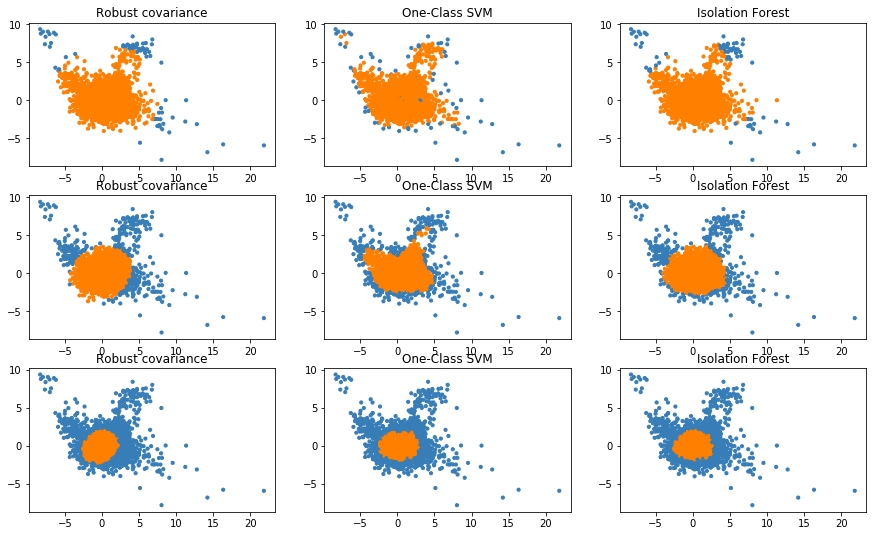

In [146]:
outliers = [0.01, 0.05, 0.15]
# define outlier/anomaly detection methods to be compared
cnt = 1
plt.figure(figsize=(15, 9))
for i, outlier in enumerate(outliers):
    anomaly_algorithms = [
        ("Robust covariance", EllipticEnvelope(contamination=outlier)),
        ("One-Class SVM", svm.OneClassSVM(nu=outlier, kernel="rbf", gamma=0.1)),
        ("Isolation Forest", IsolationForest(behaviour='new', contamination=outlier, random_state=42))
    ]
    for name, algorithm in anomaly_algorithms:
        y_pred = algorithm.fit_predict(X)
        plt.subplot(3, 3, cnt)
        cnt += 1
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
        plt.title(name)    

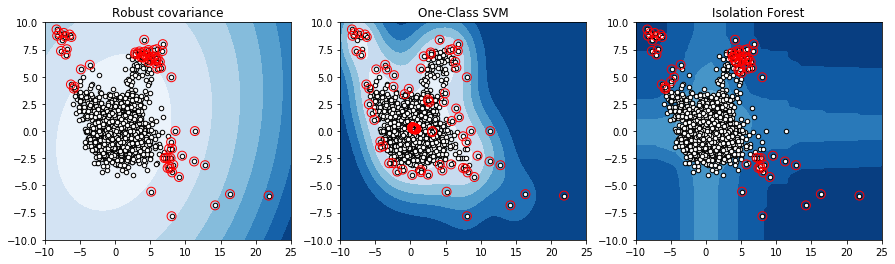

In [155]:
outlier = 0.01
anomaly_algorithms = [
        ("Robust covariance", EllipticEnvelope(contamination=outlier)),
        ("One-Class SVM", svm.OneClassSVM(nu=outlier, kernel="rbf", gamma=0.1)),
        ("Isolation Forest", IsolationForest(behaviour='new', contamination=outlier, random_state=42))
    ]
cnt = 1
plt.figure(figsize=(15, 4))
for name, algorithm in anomaly_algorithms:
    algorithm.fit(X)
    xx, yy = np.meshgrid(np.linspace(-10, 25, 50), np.linspace(-10, 10, 50))
    Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    y_pred = algorithm.fit_predict(X)

    plt.subplot(1, 3, cnt)
    cnt += 1
    plt.title(name)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    plt.scatter(X[:, 0], X[:, 1], c='w', s=20, edgecolor='k')
    plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], 
                facecolors="none", edgecolors="red", s=80, label="predicted outliers")

In [148]:
pd.DataFrame(y_pred).iloc[:,0].value_counts()

 1    7128
-1      72
Name: 0, dtype: int64